# Reinforcement learning, I - the problem

**Prerequisites**

- Linear Algebra
- Statistics and Probability
- Dynamic Programming

**Outcomes**

- Understand the core structure of the reinforcement learning project
- See how "Robot vaccums" may be an example of RL techiniques
- Know the multi-armed bandit problem and see apply the epsilon greedy algorithm to it

**References**

- Barto & Sutton book (online by authors [here](http://incompleteideas.net/book/the-book.html)) chapters 1-3

## Introduction &#x2013; Meet Roomba



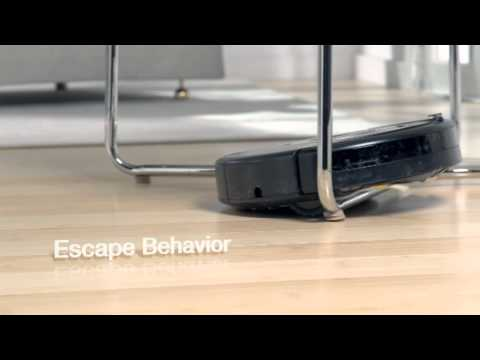

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("OljPRVMfXW4", width=800, height=600)

### My Roomba: first clean



-   Notified me it would take extra long to create a map
-   Spent about 4 hours moving a few feet, bumping into something, then
    moving a few more feet



### One Year Later



-   Now Roomba runs in about 2 1/2 hours
-   Rarely bumps in to anything
-   Cleans automatically on a schedule
-   Can clean individual rooms on command
-   Learns a new path when we re-arrange furniture



### How might Roomba work?



-   Roomba first had to `explore` my house
    -   To do this, it `acted` by moving to various locations
    -   In response to each movement Roomba received a `signal` about its `state`
        -   Is it near an object (via cameras)
        -   Did it just bump into something (via sensors)
    -   After receiving signal, Roomba chose to `act` again
-   Then, Roomba can `exploit` the knowledge it gained to achieve it's `goal`
    -   The `goal` for Roomba is to clean my house as effectively and
        efficiently as possible



## What is Reinforcement Learning?



-   Reinforcement Learning (RL) is a branch of Computer Science (Machine Learning)
    that aims to find algorithms that can learn by doing
-   To understand RL, we need to understand:
    1.  The RL problem/setting - today
    2.  RL algorithms - another day



### The Reinforcement Learning Problem

-   Time is discrete and indexed by $t$
-   At each time step (period) the RL agent observes the state of the
    environment: $S_t \in \mathcal{S}$
-   The agent must choose an action $A_t \in \mathcal{A}(S_t)$
-   At the start of period $t+1$, the agent gets a reward $R_{t+1} \in
           \mathbb{R}$
    -   Reward depends, perhaps stochastically, on $S_t$ and $A_t$

### Th RL Problem: Objective

- The RL agent and its environment give rise to the following sequence of
  events: $$S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, \dots$$
- The *goal* of the RL agent is to learn to behave optimally by interacting
  with its environment
   - Observe $S$, choose $A$, observe $R$... repeat!
   - Try to maximize all the $R_t$
- More formally: $$\max_{\{A_t\}_t} \sum_{t=0}^{T} \beta^t R_t$$


### The RL Problem, Illustrated



-   The setting for RL can be understood by diagram below (From Barto &
    Sutton book)

![./rl-setting.png](./rl-setting.png)



### Roomba as RL Problem?

- We can think of Roomba as an RL agent
- Each moment in time it receives signals from its sensors ($S_t$)
- It chooses whether to turn, slow down, speed up, etc. ($A_t$)
- Reward $R_{t+1}$ might be:
    - Collision status
    - Percentage of job complete
- Note: Roomba was almost certainly programmed more deliberately than this,
    but it is fun to think about!



### Challenges in RL



-   Solutions to the RL problem share some common challenges and obstacles
    -   Exploration vs exploitation: how to both gather information and behave
        optimally?
    -   Curse of dimensionality: $\mathcal{S}$ and $\mathcal{A}$ can be very
        large (example: self driving cars)
    -   Time delays: perhaps actions in $t$ don't impact rewards until $t+N$
        (example: exercise)
-   We'll explore the exploration/exploitation tradeoff today



## Multi-Armed Bandits



![./slot-machines.jpg](./slot-machines.jpg)



### What is a Bandit?



-   To build intuition for the properties of RL problems and algorithms, we
    will study a classic problem called the Multi-armed bandit
-   A bandit is like a slot machine at a Casino
    -   You pull the arm and a non-deterministic reward is paid out
-   A multi-armed bandit is like a row of slot machines
    -   Each machine or "bandit" has a fixed, but distinct and unknown
        distribution of payoffs



### K-Armed Bandit Problem



-   The variation of the multi-armed bandit problem we will study is as follows
-   There will be $k \in [2, 10]$ bandits
-   For each bandit $i = 1, \dots, k$ we will draw $\mu_i \sim U[-3,3]$
-   If in time step $t$ the agent selects bandit $i$, we have $R_{t+1}\sim
           N(\mu_i, 1)$
-   The agent is allowed to know this structure (returns are normally
    distributed with an $i$ specific mean)



### Values

-   Let $a \in \mathcal{A}$ represent an arbitrary action
-   Let $q_{*}: \mathcal{A} \Longrightarrow \mathbb{R}$, such that
    $q_{*}(a)$ represents the the value of an RL agent of choosing $a$
-   It must be that $$q_{*}(a) \equiv E[R_{t+1} | A_t = a]$$

-   The agent does not know the value of this expectation, but can approximate it
    -   Let $Q_t: \mathcal{S} \times \mathcal{A} \Longrightarrow \mathbb{R}$ represent the
        agent's approximation for the value function at time $t$: $$Q_t(S_t, a)
                 \equiv E_t[q_{*}(a)] = E_t[R_{t+1} + Q_{t+1}(S_{t+1}, A_{t+1})| A_t =
                 a]$$

### Policies



-   In RL a policy is a rule that dictates behavior
-   Mathematically, a policy is a function: $\pi_t: \mathcal{S} \times
           \mathbb{R} \Longrightarrow \mathcal{A}$
-   Policies can be **determinsitic**: for each $S, R$ they always map to the
    same $A$
-   Policies can be **stochastic**: for each $S, R$ they map to a probability
    distribution over $\mathcal{A}$
-   Policies can be **greedy**: select the action that maximizes $E_t[R_{t+1} | S_t, A_t]$



### $\epsilon$ -Greedy Policies



-   When playing a greedy policy, the RL agent chooses to forgo `exploration`
    of the environment and `exploit` knowledge previously obtained
-   This can be optimal, but only when the agent knows the best action
-   When there is uncertainty about payoffs, it pays to explore, sometimes
-   One way to handle the explore-exploit tradeoff is to use an
    $\epsilon$ -greedy policy
    -   With probability $1-\epsilon$ select a random action, with equal weights
    -   With probability $\epsilon$ select the action you believe is best




### Application to Bandit Problem

See interactive example [here](https://sglyon.github.io/bandits/)
